In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
vocab = {}
with open('Simplified_Chinese_LIWC2015_Dictionary.dic') as f:
    for line in f.readlines()[83:]:
        x = line.strip().split('\t')
        vocab[x[0]] = x[1:]
print(len(vocab))

9720


In [3]:
vector_names = ['zhihu', 'renmin', 'weibo', 'literature', 'wiki', 'sogou', 'baidu']
extended_list = []
for name in vector_names:
    with open('./extended_vocab/extended_{}_100.json'.format(name), 'r') as f:
        extended_list.append(json.load(f))

In [4]:
def get_counts(topn, threshold):
    counts = {}
    for word in vocab.keys():
        for extended in extended_list:
            if word in extended:
                for word_sim_pair in extended[word][:topn]:
                    new_word = word_sim_pair[0]
                    similarity = word_sim_pair[1]
                    if new_word not in vocab and similarity > threshold:
                        if word not in counts:
                            counts[word] = {}
                        if new_word not in counts[word]:
                            counts[word][new_word] = 1
                        else:
                            counts[word][new_word] += 1
    return counts

In [5]:
def get_all_counts(topns, thresholds):
    all_counts = {}
    for topn in topns:
        for threshold in thresholds:
            print('Getting topn={} and threshold={}'. format(topn, threshold))
            all_counts['{}_{}'.format(topn, threshold)] = get_counts(topn, threshold)
    return all_counts

In [6]:
def plot_counts(counts, topn, threshold):
    freq = {}
    for word in counts:
        for val in counts[word].values():
            freq.setdefault(val, 0)
            freq[val] += 1
    freq = dict(sorted(freq.items()))
    plt.figure(figsize=(9,6))
    ax = sns.barplot(x=list(freq.keys()), y=list(freq.values()))
    for val in freq:
        ax.text(val-1, freq[val]+freq[1]/100, freq[val], ha="center", size=12)
    ax.set_title('Hyperparameters: topn={}, threshold={}'.format(topn, threshold), size=16);

In [7]:
def get_large_counts(counts, thresh):
    counts_large = {}
    for word in counts:
        for new_word in counts[word]:
            if counts[word][new_word] >= thresh:
                counts_large.setdefault(word, {})
                counts_large[word][new_word] = counts[word][new_word]
    return counts_large

In [8]:
topns_to_check = list(range(5, 105, 5))
thresholds_to_check = np.arange(0.6, 0.9, 0.01)
for i in range(len(thresholds_to_check)):
    thresholds_to_check[i] = round(thresholds_to_check[i], 2)

In [9]:
all_counts = get_all_counts(topns_to_check, thresholds_to_check)

Getting topn=5 and threshold=0.6
Getting topn=5 and threshold=0.61
Getting topn=5 and threshold=0.62
Getting topn=5 and threshold=0.63
Getting topn=5 and threshold=0.64
Getting topn=5 and threshold=0.65
Getting topn=5 and threshold=0.66
Getting topn=5 and threshold=0.67
Getting topn=5 and threshold=0.68
Getting topn=5 and threshold=0.69
Getting topn=5 and threshold=0.7
Getting topn=5 and threshold=0.71
Getting topn=5 and threshold=0.72
Getting topn=5 and threshold=0.73
Getting topn=5 and threshold=0.74
Getting topn=5 and threshold=0.75
Getting topn=5 and threshold=0.76
Getting topn=5 and threshold=0.77
Getting topn=5 and threshold=0.78
Getting topn=5 and threshold=0.79
Getting topn=5 and threshold=0.8
Getting topn=5 and threshold=0.81
Getting topn=5 and threshold=0.82
Getting topn=5 and threshold=0.83
Getting topn=5 and threshold=0.84
Getting topn=5 and threshold=0.85
Getting topn=5 and threshold=0.86
Getting topn=5 and threshold=0.87
Getting topn=5 and threshold=0.88
Getting topn=5 an

Getting topn=40 and threshold=0.79
Getting topn=40 and threshold=0.8
Getting topn=40 and threshold=0.81
Getting topn=40 and threshold=0.82
Getting topn=40 and threshold=0.83
Getting topn=40 and threshold=0.84
Getting topn=40 and threshold=0.85
Getting topn=40 and threshold=0.86
Getting topn=40 and threshold=0.87
Getting topn=40 and threshold=0.88
Getting topn=40 and threshold=0.89
Getting topn=40 and threshold=0.9
Getting topn=45 and threshold=0.6
Getting topn=45 and threshold=0.61
Getting topn=45 and threshold=0.62
Getting topn=45 and threshold=0.63
Getting topn=45 and threshold=0.64
Getting topn=45 and threshold=0.65
Getting topn=45 and threshold=0.66
Getting topn=45 and threshold=0.67
Getting topn=45 and threshold=0.68
Getting topn=45 and threshold=0.69
Getting topn=45 and threshold=0.7
Getting topn=45 and threshold=0.71
Getting topn=45 and threshold=0.72
Getting topn=45 and threshold=0.73
Getting topn=45 and threshold=0.74
Getting topn=45 and threshold=0.75
Getting topn=45 and thre

Getting topn=80 and threshold=0.66
Getting topn=80 and threshold=0.67
Getting topn=80 and threshold=0.68
Getting topn=80 and threshold=0.69
Getting topn=80 and threshold=0.7
Getting topn=80 and threshold=0.71
Getting topn=80 and threshold=0.72
Getting topn=80 and threshold=0.73
Getting topn=80 and threshold=0.74
Getting topn=80 and threshold=0.75
Getting topn=80 and threshold=0.76
Getting topn=80 and threshold=0.77
Getting topn=80 and threshold=0.78
Getting topn=80 and threshold=0.79
Getting topn=80 and threshold=0.8
Getting topn=80 and threshold=0.81
Getting topn=80 and threshold=0.82
Getting topn=80 and threshold=0.83
Getting topn=80 and threshold=0.84
Getting topn=80 and threshold=0.85
Getting topn=80 and threshold=0.86
Getting topn=80 and threshold=0.87
Getting topn=80 and threshold=0.88
Getting topn=80 and threshold=0.89
Getting topn=80 and threshold=0.9
Getting topn=85 and threshold=0.6
Getting topn=85 and threshold=0.61
Getting topn=85 and threshold=0.62
Getting topn=85 and thre

In [10]:
topns_to_plot = [5, 10, 20, 50, 100]
thresholds_to_plot = [0.6, 0.7, 0.8, 0.9]

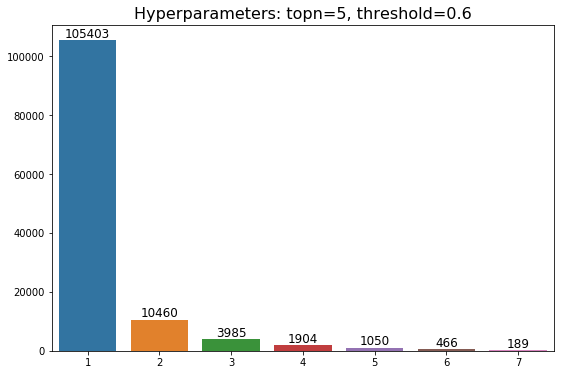

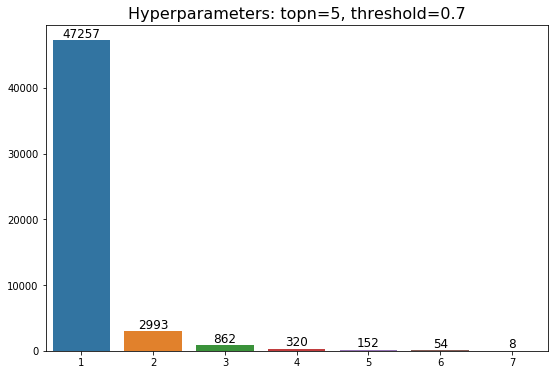

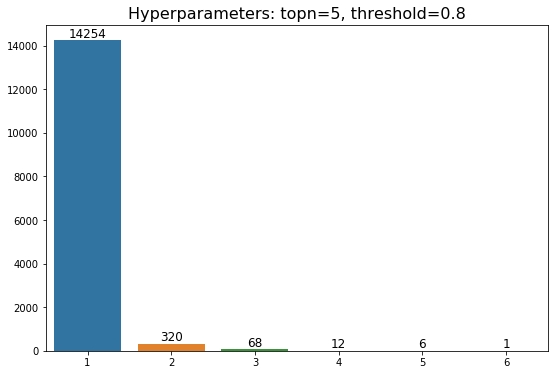

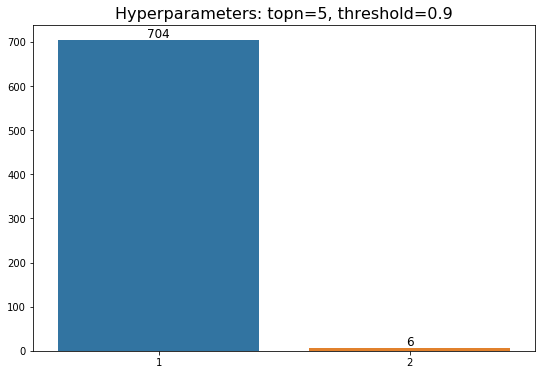

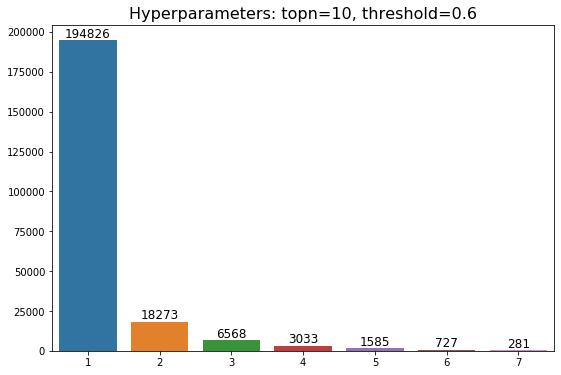

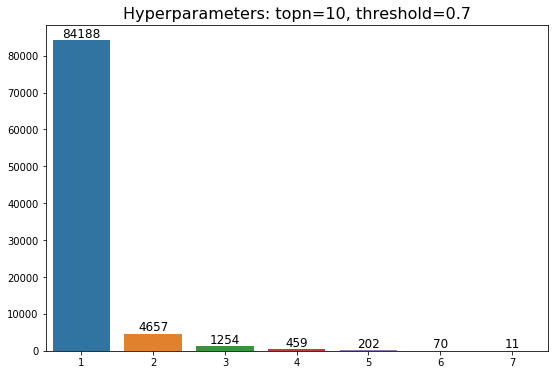

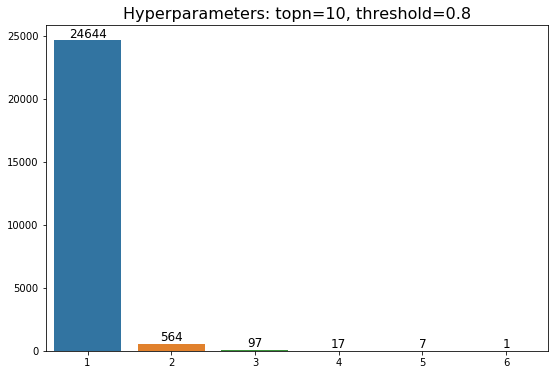

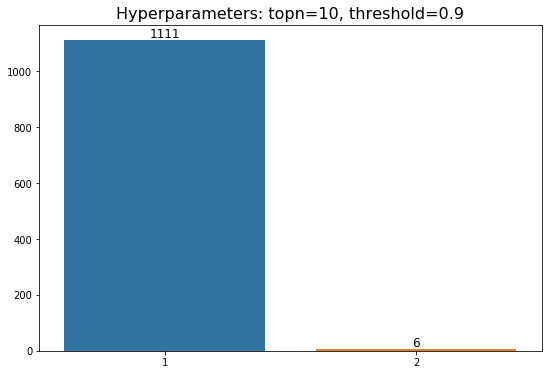

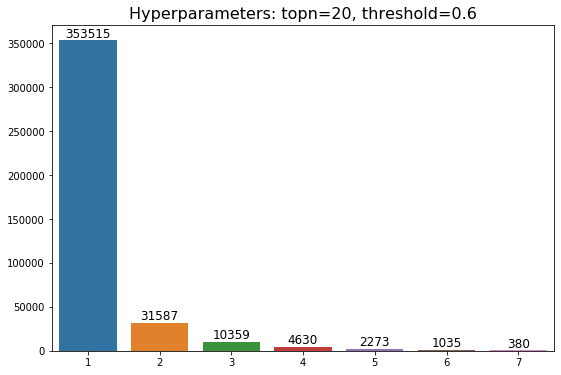

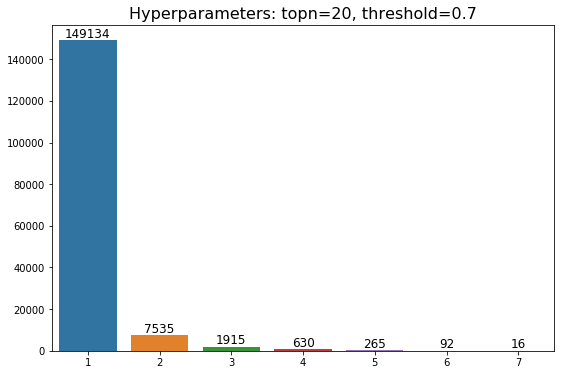

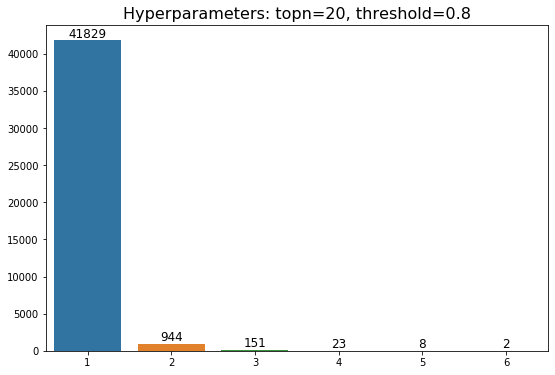

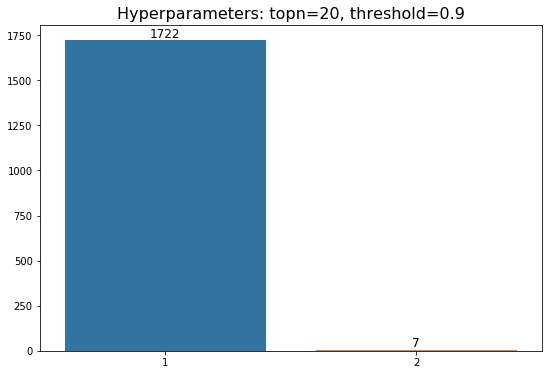

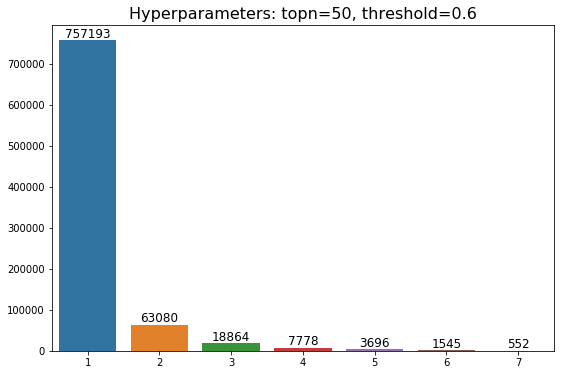

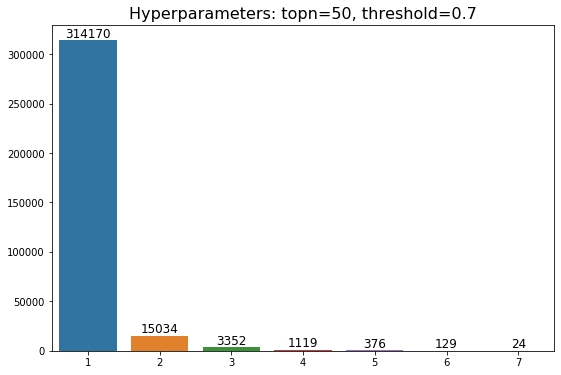

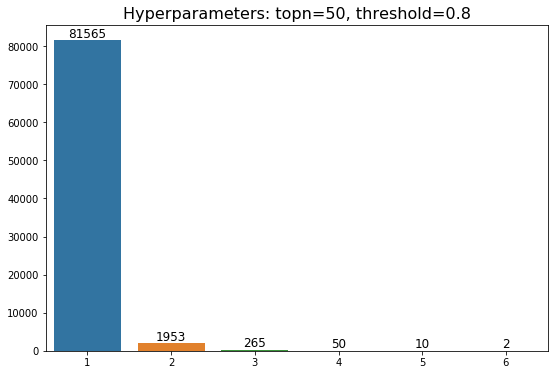

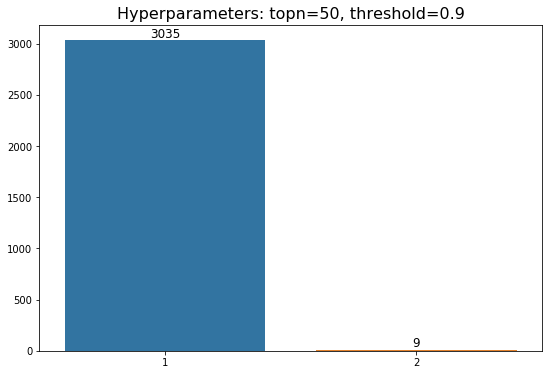

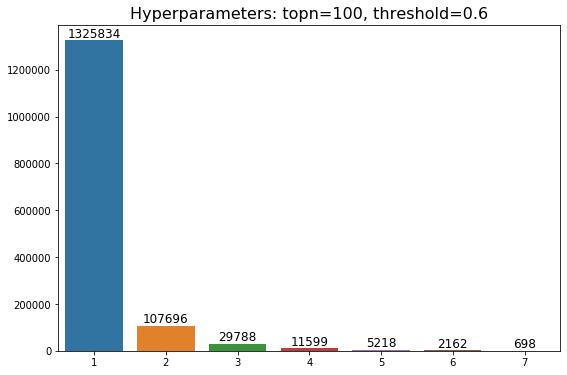

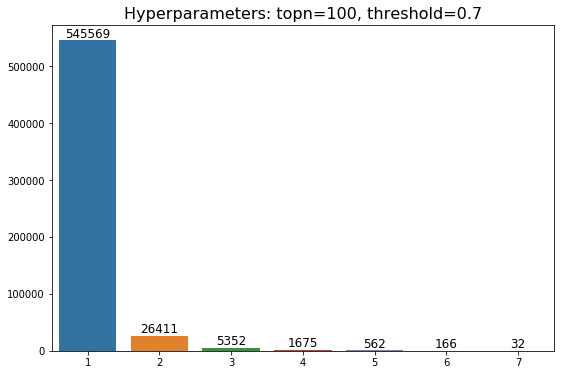

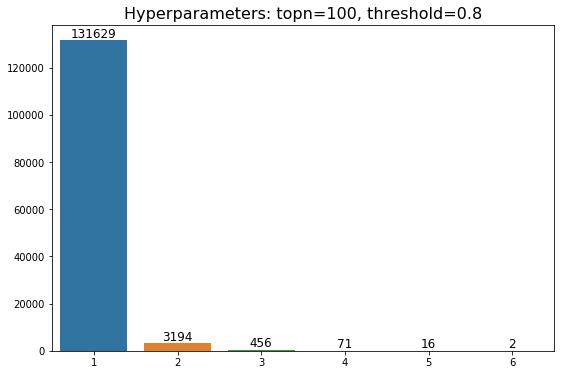

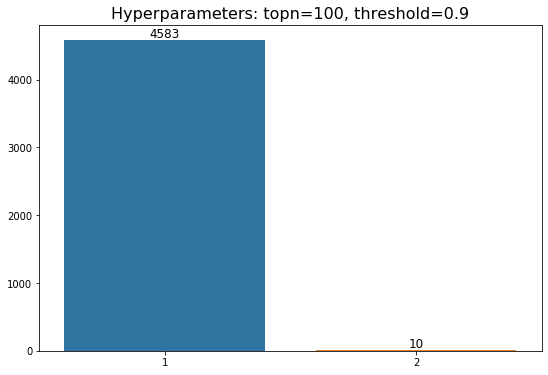

In [11]:
for topn in topns_to_plot:
    for threshold in thresholds_to_plot:
        counts = all_counts['{}_{}'.format(topn, threshold)]
        plot_counts(counts, topn, threshold)

In [12]:
large_counts = {}
for counts_name in all_counts:
    counts = all_counts[counts_name]
    large_counts[counts_name] = get_large_counts(counts, 2)

In [13]:
topn_value_dict = {}
for topn in topns_to_check:
    topn_value_dict[topn] = []
    for threshold in thresholds_to_check:
        key = '{}_{}'.format(topn, threshold)
        print('Dealing with', key)
        values = set()
        for word in large_counts[key]:
            values = values.union(set(large_counts[key][word].keys()))
        topn_value_dict[topn].append(len(values))

Dealing with 5_0.6
Dealing with 5_0.61
Dealing with 5_0.62
Dealing with 5_0.63
Dealing with 5_0.64
Dealing with 5_0.65
Dealing with 5_0.66
Dealing with 5_0.67
Dealing with 5_0.68
Dealing with 5_0.69
Dealing with 5_0.7
Dealing with 5_0.71
Dealing with 5_0.72
Dealing with 5_0.73
Dealing with 5_0.74
Dealing with 5_0.75
Dealing with 5_0.76
Dealing with 5_0.77
Dealing with 5_0.78
Dealing with 5_0.79
Dealing with 5_0.8
Dealing with 5_0.81
Dealing with 5_0.82
Dealing with 5_0.83
Dealing with 5_0.84
Dealing with 5_0.85
Dealing with 5_0.86
Dealing with 5_0.87
Dealing with 5_0.88
Dealing with 5_0.89
Dealing with 5_0.9
Dealing with 10_0.6
Dealing with 10_0.61
Dealing with 10_0.62
Dealing with 10_0.63
Dealing with 10_0.64
Dealing with 10_0.65
Dealing with 10_0.66
Dealing with 10_0.67
Dealing with 10_0.68
Dealing with 10_0.69
Dealing with 10_0.7
Dealing with 10_0.71
Dealing with 10_0.72
Dealing with 10_0.73
Dealing with 10_0.74
Dealing with 10_0.75
Dealing with 10_0.76
Dealing with 10_0.77
Dealing 

Dealing with 70_0.61
Dealing with 70_0.62
Dealing with 70_0.63
Dealing with 70_0.64
Dealing with 70_0.65
Dealing with 70_0.66
Dealing with 70_0.67
Dealing with 70_0.68
Dealing with 70_0.69
Dealing with 70_0.7
Dealing with 70_0.71
Dealing with 70_0.72
Dealing with 70_0.73
Dealing with 70_0.74
Dealing with 70_0.75
Dealing with 70_0.76
Dealing with 70_0.77
Dealing with 70_0.78
Dealing with 70_0.79
Dealing with 70_0.8
Dealing with 70_0.81
Dealing with 70_0.82
Dealing with 70_0.83
Dealing with 70_0.84
Dealing with 70_0.85
Dealing with 70_0.86
Dealing with 70_0.87
Dealing with 70_0.88
Dealing with 70_0.89
Dealing with 70_0.9
Dealing with 75_0.6
Dealing with 75_0.61
Dealing with 75_0.62
Dealing with 75_0.63
Dealing with 75_0.64
Dealing with 75_0.65
Dealing with 75_0.66
Dealing with 75_0.67
Dealing with 75_0.68
Dealing with 75_0.69
Dealing with 75_0.7
Dealing with 75_0.71
Dealing with 75_0.72
Dealing with 75_0.73
Dealing with 75_0.74
Dealing with 75_0.75
Dealing with 75_0.76
Dealing with 75_0.

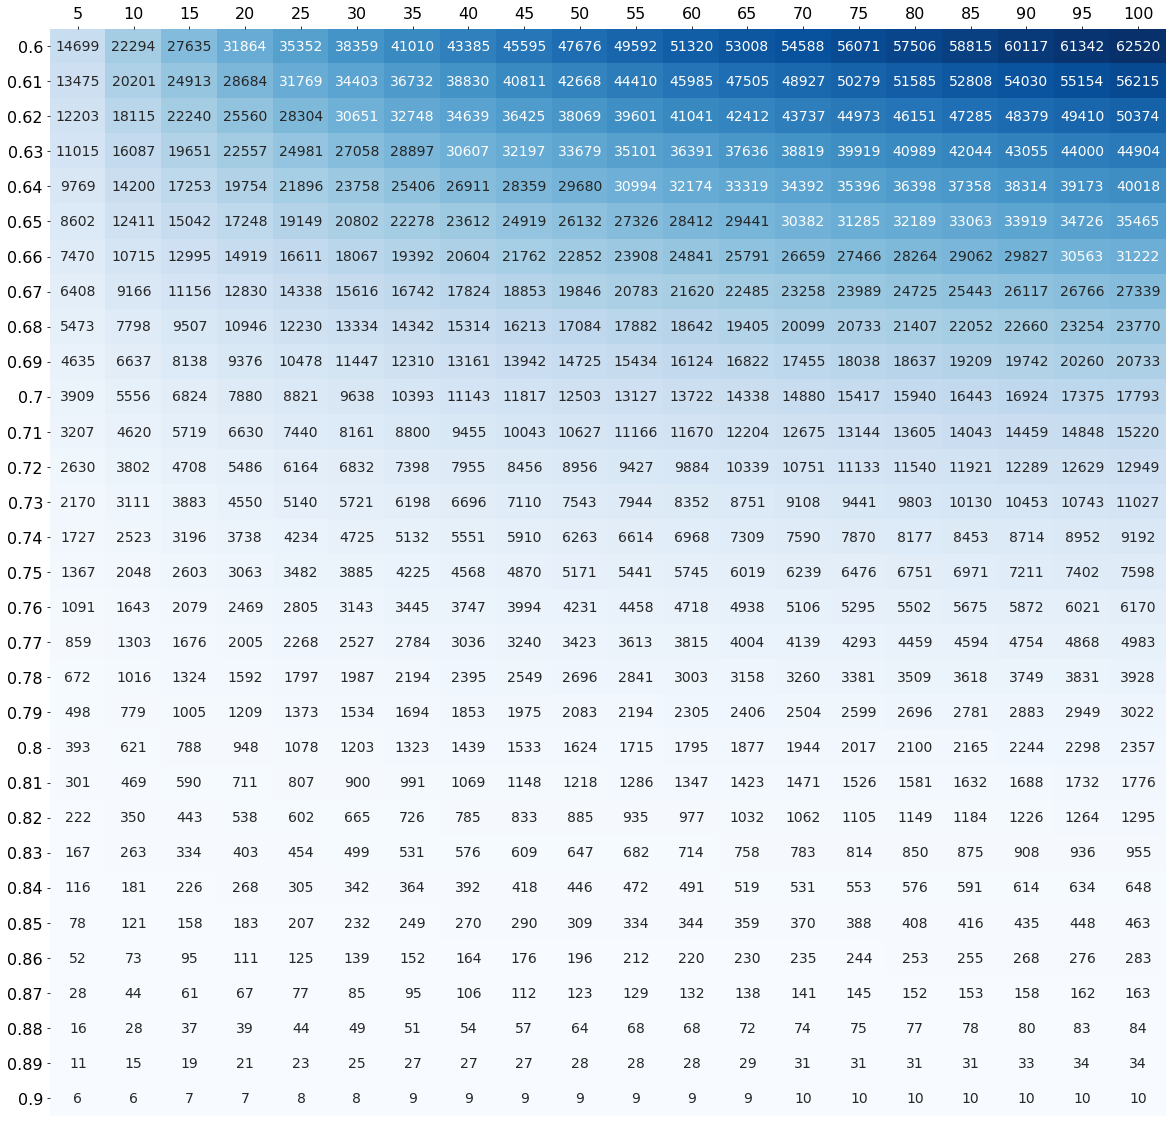

In [14]:
count_table = pd.DataFrame(topn_value_dict)
count_table.index = thresholds_to_check
count_table
plt.figure(figsize=(20,20))
ax = sns.heatmap(count_table, annot=True, cbar=False, fmt='g', annot_kws={'size':14}, cmap=plt.cm.get_cmap('Blues'))

ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=16)
ax.set_yticklabels(ax.get_ymajorticklabels(), rotation=0, fontsize=16);

In [16]:
large_counts['20_0.8']

{'55': {'65': 2, '45': 2},
 '78': {'67': 2},
 '8': {'7': 5,
  '9': 5,
  '6': 5,
  '12': 3,
  '11': 3,
  '4': 3,
  '5': 4,
  '10': 2,
  '3': 3,
  '2': 2},
 '84': {'87': 2, '82': 2, '85': 2},
 'NB': {'YS': 2},
 'cheese': {'cream': 3, 'butter': 2},
 'cool': {'watching': 2},
 'e-mail': {'或电子邮件': 2},
 'email': {'mail': 2},
 'ex': {'deus': 2, 'non': 2},
 'facebook': {'myspace': 2},
 'fuck': {'thank': 2},
 'love': {'say': 2},
 'maybe': {'happens': 2},
 'shit': {'fucking': 2},
 'yeah': {'remember': 2},
 'youtube': {'yahoo': 2, 'myspace': 3},
 'ㄏ': {'ㄎ': 2, 'ㄐ': 2, 'ㄋ': 2, 'ㄓ': 2},
 '上涨': {'下跌': 2},
 '下旬': {'月初': 2},
 '下游': {'上游': 2},
 '下端': {'上端': 2},
 '不孕': {'不孕症': 2},
 '两者': {'二者': 3},
 '主任': {'副主任': 3},
 '乳白': {'淡黄': 2,
  '酱色': 2,
  '淡紫': 3,
  '淡绿': 3,
  '微黄': 2,
  '米黄': 4,
  '奶白': 2,
  '浅黄': 2,
  '棕红': 3,
  '淡红': 2,
  '肉红': 2,
  '深黄': 2,
  '粉蓝': 2,
  '乳黄': 3,
  '棕黄': 3,
  '靛蓝色': 2},
 '二头肌': {'肱': 4, '三角肌': 4, '筋腱': 2, '三头肌': 3, '股四头肌': 2, '腓肠肌': 2},
 '仍': {'依然': 2},
 '仍然': {'依然': 4},
 '伏特加